In [1]:
# https://www.kaggle.com/ivanwang2016/baseline 
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'train', 'train.csv', 'sample_submission.csv']


In [2]:
os.chdir("../input/")

In [3]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [4]:
BATCH_SIZE = 64
EPOACH = 251
img_size = 32

In [5]:
## design model
def base_model():
    model = Sequential()

    #
    model.add(Conv2D(64, kernel_size=5, input_shape=(32,32,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(.25))
#     model.add(MaxPool2D(strides=2))
    
    #
    model.add(Conv2D(64, kernel_size=5,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(.25))
#     model.add(MaxPool2D(strides=2))
    
    #
    model.add(Conv2D(64, kernel_size=5,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(.3))

    #
    model.add(Conv2D(128, kernel_size=5,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(.25))
    
    #
    model.add(Conv2D(256, kernel_size=5,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(.25))
    
    #
    model.add(Conv2D(256, kernel_size=5,padding="same",activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(.20))
    
    model.add(Conv2D(256, kernel_size=3,padding="same",activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(.20))
    
    #
    model.add(Conv2D(512, kernel_size=5,padding="same",activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(.25))
#     model.add(MaxPool2D(strides=2))

    #
    model.add(Conv2D(512, kernel_size=5,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(.20))
    
    #
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.20))
    
    #
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.25))
    
    #
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    
    # output
    model.add(Dense(1, activation='sigmoid'))

#     opt = keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True)
#     model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    #compile
    opt = keras.optimizers.Adam(lr=0.001,decay=1e-6)
    model.compile(loss = "binary_crossentropy",
                     optimizer = opt,
                     metrics = ['accuracy'])
    return model
base_model().summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        102464    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)  

In [6]:
df_train = pd.read_csv("../input/train.csv")
df_train.head(2)
print(np.unique(df_train["has_cactus"], return_counts=True))

(array([0, 1]), array([ 4364, 13136]))


In [7]:
## data generator

# gen_img = ImageDataGenerator(rescale=1./255., validation_split=0.1, horizontal_flip=True, vertical_flip=True)

# data_gen = gen_img.flow_from_dataframe(dataframe=df_train, directory='../input/train/train', 
#                                                   x_col = df_train["id"], y_col=df_train["has_cactus"],
#                                                   target_size=(32, 32), class_mode="binary", batch_size=BATCH_SIZE)

# data_gen = ImageDataGenerator.flow_from_dataframe(dataframe=df_train, directory='../input/train/train', 
#                                                   x_col = df_train["id"], y_col=df_train["has_cactus"],has_ext=True,
#                                                  target_size=(32, 32), class_mode="binary", batch_size=BATCH_SIZE,
#                                                   shuffle=True, subset='validation')



In [8]:
#ls "../input/train/train/"|grep "fff43acb3b7a23edcc4ae937be2b7522"

In [9]:
import cv2
#from keras.utils.np_utils import to_categorical 
from sklearn.model_selection import train_test_split
training_data = []


for i in range(len(df_train)):   #len(df_train)
    img_id = df_train["id"][i]
    train_img =  cv2.imread(os.path.join("../input/train/train/",str(img_id)))
    training_data.append(train_img)
    #plt.imshow(train_img, cmap='gray')
y_train_all = df_train["has_cactus"]
    
training_data = np.array(training_data)
training_data = training_data.reshape(-1, img_size, img_size,3)
print("training data shape ", training_data.shape)    


#train test split
X_train, X_test, y_train, y_test = train_test_split(training_data, y_train_all, test_size=0.2,stratify=y_train_all)

#normalize
X_train = keras.utils.normalize(X_train,axis=1)
X_test = keras.utils.normalize(X_test,axis=1)

print("shapes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

training data shape  (17500, 32, 32, 3)
shapes:  (14000, 32, 32, 3) (3500, 32, 32, 3) (14000,) (3500,)


In [10]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1]), array([ 3491, 10509]))
(array([0, 1]), array([ 873, 2627]))


In [11]:
#construct the image generator for data augmentation
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, vertical_flip=True)

In [12]:
#model train
import time

#early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
annealer = keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)


model = base_model()
tic = time.time()
hist = model.fit_generator(aug.flow(X_train, y_train,batch_size=BATCH_SIZE), 
                           epochs=EPOACH,
                           steps_per_epoch=len(X_train) // BATCH_SIZE,
                           validation_data=(X_test,y_test),
                           callbacks=[ annealer])
toc = time.time()
print("time taken: ", toc-tic)

#evaluate


Instructions for updating:
Use tf.cast instead.
Epoch 1/251
218/218 [==============================] - 23s 105ms/step - loss: 0.3620 - acc: 0.8658 - val_loss: 3.9744 - val_acc: 0.7506
Epoch 2/251
218/218 [==============================] - 14s 66ms/step - loss: 0.1436 - acc: 0.9483 - val_loss: 3.4809 - val_acc: 0.2837
Epoch 3/251
218/218 [==============================] - 14s 65ms/step - loss: 0.1251 - acc: 0.9558 - val_loss: 1.6821 - val_acc: 0.5754
Epoch 4/251
218/218 [==============================] - 14s 65ms/step - loss: 0.1042 - acc: 0.9628 - val_loss: 1.5743 - val_acc: 0.7534
Epoch 5/251
218/218 [==============================] - 14s 65ms/step - loss: 0.1110 - acc: 0.9599 - val_loss: 1.1028 - val_acc: 0.7603
Epoch 6/251
218/218 [==============================] - 14s 65ms/step - loss: 0.0904 - acc: 0.9712 - val_loss: 1.3421 - val_acc: 0.7560
Epoch 7/251
218/218 [==============================] - 14s 65ms/step - loss: 0.0856 - acc: 0.9692 - val_loss: 0.1672 - val_acc: 0.9309
Epoch 

218/218 [==============================] - 14s 64ms/step - loss: 0.0245 - acc: 0.9910 - val_loss: 0.0256 - val_acc: 0.9920
Epoch 60/251
218/218 [==============================] - 14s 65ms/step - loss: 0.0271 - acc: 0.9905 - val_loss: 0.0253 - val_acc: 0.9920
Epoch 61/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0260 - acc: 0.9903 - val_loss: 0.0259 - val_acc: 0.9914
Epoch 62/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0240 - acc: 0.9910 - val_loss: 0.0255 - val_acc: 0.9920
Epoch 63/251
218/218 [==============================] - 14s 65ms/step - loss: 0.0257 - acc: 0.9910 - val_loss: 0.0264 - val_acc: 0.9917
Epoch 64/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0269 - acc: 0.9906 - val_loss: 0.0254 - val_acc: 0.9920
Epoch 65/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0258 - acc: 0.9903 - val_loss: 0.0259 - val_acc: 0.9914
Epoch 66/251
218/218 [==============================] - 14s 6

218/218 [==============================] - 14s 64ms/step - loss: 0.0276 - acc: 0.9905 - val_loss: 0.0254 - val_acc: 0.9920
Epoch 120/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0254 - acc: 0.9908 - val_loss: 0.0257 - val_acc: 0.9920
Epoch 121/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0277 - acc: 0.9903 - val_loss: 0.0259 - val_acc: 0.9920
Epoch 122/251
218/218 [==============================] - 14s 65ms/step - loss: 0.0207 - acc: 0.9927 - val_loss: 0.0253 - val_acc: 0.9923
Epoch 123/251
218/218 [==============================] - 14s 65ms/step - loss: 0.0237 - acc: 0.9910 - val_loss: 0.0259 - val_acc: 0.9920
Epoch 124/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0255 - acc: 0.9910 - val_loss: 0.0255 - val_acc: 0.9923
Epoch 125/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0252 - acc: 0.9913 - val_loss: 0.0256 - val_acc: 0.9923
Epoch 126/251
218/218 [==============================] 

Epoch 179/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0233 - acc: 0.9917 - val_loss: 0.0256 - val_acc: 0.9920
Epoch 180/251
218/218 [==============================] - 14s 65ms/step - loss: 0.0238 - acc: 0.9919 - val_loss: 0.0257 - val_acc: 0.9923
Epoch 181/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0252 - acc: 0.9911 - val_loss: 0.0255 - val_acc: 0.9923
Epoch 182/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0257 - acc: 0.9919 - val_loss: 0.0254 - val_acc: 0.9923
Epoch 183/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0239 - acc: 0.9912 - val_loss: 0.0256 - val_acc: 0.9923
Epoch 184/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0262 - acc: 0.9908 - val_loss: 0.0256 - val_acc: 0.9923
Epoch 185/251
218/218 [==============================] - 14s 65ms/step - loss: 0.0271 - acc: 0.9899 - val_loss: 0.0259 - val_acc: 0.9920
Epoch 186/251
218/218 [==================

Epoch 239/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0244 - acc: 0.9915 - val_loss: 0.0253 - val_acc: 0.9923
Epoch 240/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0254 - acc: 0.9907 - val_loss: 0.0256 - val_acc: 0.9923
Epoch 241/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0229 - acc: 0.9920 - val_loss: 0.0256 - val_acc: 0.9923
Epoch 242/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0273 - acc: 0.9905 - val_loss: 0.0256 - val_acc: 0.9923
Epoch 243/251
218/218 [==============================] - 14s 66ms/step - loss: 0.0271 - acc: 0.9898 - val_loss: 0.0254 - val_acc: 0.9923
Epoch 244/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0260 - acc: 0.9907 - val_loss: 0.0262 - val_acc: 0.9920
Epoch 245/251
218/218 [==============================] - 14s 64ms/step - loss: 0.0269 - acc: 0.9900 - val_loss: 0.0257 - val_acc: 0.9923
Epoch 246/251
218/218 [==================

In [ ]:
final_loss, final_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Final loss: {final_loss:.4f}, final accuracy: {final_acc:.4f}")

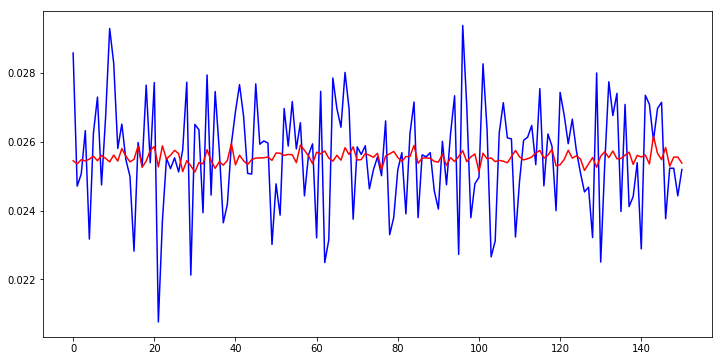

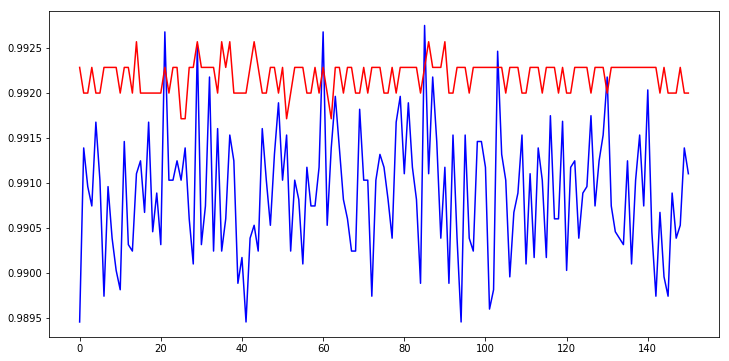

In [14]:
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'][100:], color='b')
plt.plot(hist.history['val_loss'][100:], color='r')

plt.figure(figsize=(12,6))
plt.plot(hist.history['acc'][100:], color='b')
plt.plot(hist.history['val_acc'][100:], color='r')


In [15]:
print(df_train[df_train["id"]=="0004be2cfeaba1c0361d39e2b000257b.jpg"]["id"])

from PIL import Image
data_ = np.array(Image.open('../input/train/train/'+ '0004be2cfeaba1c0361d39e2b000257b.jpg'))
print(data_.shape)

0    0004be2cfeaba1c0361d39e2b000257b.jpg
Name: id, dtype: object
(32, 32, 3)


In [16]:
# test file 
from tqdm import tqdm_notebook, tqdm
test_dir_path = "../input/test/test/"
test_data = []
test_file_names = []

for file in tqdm(os.listdir(test_dir_path)):
    test_img =  cv2.imread(os.path.join(test_dir_path,str(file)))
    test_file_names.append(str(file))
    test_data.append(test_img)
    
test_data = np.array(test_data)
test_data = test_data.reshape(-1, img_size, img_size,3)
print("test data shape ", test_data.shape)    

#normalize
test_data = keras.utils.normalize(test_data,axis=1)

print("shapes: ", test_data.shape)

100%|██████████| 4000/4000 [00:13<00:00, 306.82it/s]


test data shape  (4000, 32, 32, 3)
shapes:  (4000, 32, 32, 3)


In [20]:
test_pred = model.predict(test_data)
test_pred = np.round(test_pred)
print("test_pred shape: ",test_pred.shape)
print(test_pred[:10])

test_pred shape:  (4000, 1)
[[1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [21]:
test_file_names = np.array(test_file_names)
print(test_file_names.shape)

(4000,)


In [22]:
subm = pd.DataFrame({"id":test_file_names,"has_cactus":test_pred[:,0]})
subm.to_csv("/kaggle/working/submission_file.csv",sep=',',index=False)
subm.head()

,id,has_cactus
0,c662bde123f0f83b3caae0ffda237a93.jpg,1.0
1,9553eed7793d4cf88b5226d446d93dae.jpg,0.0
2,19f059a7ce41b25be1548bc4049b45ec.jpg,1.0
3,fb4f464486f4894330273346ce939252.jpg,1.0
4,b52558a522db6ec2501ae188b6d6e526.jpg,0.0
